In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ H = C_1 n_q^2 - C_2 \cos(\phi)) +  C_3 \cos(2\phi))$$

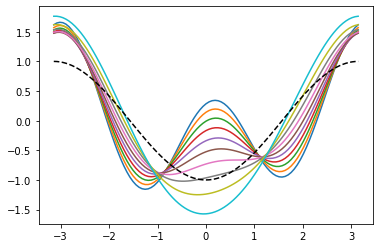

In [140]:
C1 = 0.05
C2 = 1
C3 = 1
phi0 = -0.1*np.pi

N = 101

phi = np.linspace(-np.pi,np.pi,N)

def V(phi,C3=C3):
    return -C2/(0.5+C3)*np.cos(phi) + C3*np.cos(2*phi+phi0)

fig, ax = plt.subplots()
for tmpC3 in np.arange(C3,0,-0.1):
    ax.plot(phi,V(phi,C3=tmpC3))

ax.plot(phi,-np.cos(phi),'k--')

$$ n_q \rightarrow -i\hbar \partial_\phi  \quad , \quad n_q^2 \rightarrow - \hbar^2 \partial_\phi^2$$

In [126]:
dphi = np.mean(phi[1:] - phi[:-1])

Kinetic_energy = -C1/dphi**2*(np.diag(-2*np.ones(N)) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1))
Potential_energy = np.diag(V(phi))

In [127]:
H = Kinetic_energy + Potential_energy
eigvals, eigvecs = np.linalg.eigh(H)
eigvecs = eigvecs.T

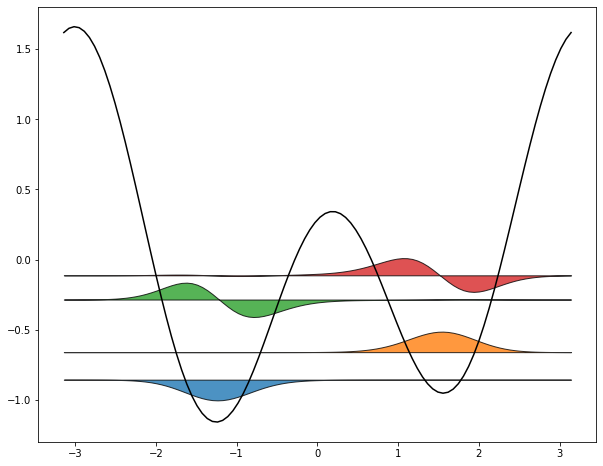

In [130]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(phi,V(phi),'k')
indices = [0,1,2,3]
for i in indices:
    ax.fill_between(phi,eigvecs[i]*10*C1+eigvals[i],[eigvals[i] for _ in phi],label='n=%d'%i,edgecolor='k',alpha=0.8)

$$
\phi \rightarrow -i\hbar \partial_{n_q}
\quad , \quad
\phi^2 \rightarrow - \hbar^2 \partial_{n_q}^2
$$

In [151]:
(t.diag(t.ones(N-1),1) - t.diag(t.ones(N-1),-1))/(2*dphi)

tensor([[ 0.0000,  7.8782,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-7.8782,  0.0000,  7.8782,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -7.8782,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  7.8782,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ..., -7.8782,  0.0000,  7.8782],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, -7.8782,  0.0000]])

In [144]:
import torch as t

In [147]:
nq = t.linspace(-np.pi/dphi,np.pi/dphi,N)

term1 = C1*t.diag(nq**2)
term2 = -C2*